Importing:

In [12]:
import json
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [13]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [14]:
%run "../DL_notebooks/src/dataloading.ipynb"
%run "../DL_notebooks/src/training.ipynb"
%run "../DL_notebooks/src/evaluate.ipynb"
%run "../DL_notebooks/src/visualizations.ipynb"
%run "../DL_notebooks/model_architectures.ipynb"

Data loaded and split into training, validation and testing datasets


Training:

In [15]:

with open('../DL_notebooks/configs/model_configs.json', 'r') as model_config_file:
    model_configs = json.load(model_config_file)

for config in model_configs:
    if config['model-architecture'] == 'ResNet':
        epochs = config['epoch-count']
        optimizer_lr = config['optimizer-lr']

        num_classes = config['resnet-model-hyperparameters']['num_classes']
        layers = config['resnet-model-hyperparameters']['layers']
        model = MRI_ResNet(BasicBlock,layers,num_classes) 

        if config['loss-function'] == 'cross-entropy':
            criterion = nn.CrossEntropyLoss()

        if config['optimizer'] == 'adam':
            optimizer = optim.Adam(model.parameters(), lr=optimizer_lr)
        model = model.to(device)
    elif config['model-architecture'] == 'ResNet2':
        epochs2 = config['epoch-count']
        optimizer_lr2 = config['optimizer-lr']

        num_classes2 = config['resnet2-model-hyperparameters']['num_classes']
        model2 = MRI_ResNet2(num_classes) 

        if config['loss-function'] == 'cross-entropy':
            criterion2 = nn.CrossEntropyLoss()

        if config['optimizer'] == 'adam':
            optimizer2 = optim.Adam(model.parameters(), lr=optimizer_lr2)
        elif config['optimizer'] == 'adamW':
            optimizer2 = optim.AdamW(model.parameters(), lr=optimizer_lr2)
        model2 = model2.to(device)

        



Training and Testing Scratch ResNet:

In [16]:
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )


Training:   5%|▌         | 1/20 [00:09<02:52,  9.08s/epoch]

Epoch [1/20] Train Loss: 0.9699 Train Accuracy: 58.70% Validation Loss: 2.0161 Validation Accuracy: 35.06%


Training:  10%|█         | 2/20 [00:17<02:38,  8.80s/epoch]

Epoch [2/20] Train Loss: 0.5669 Train Accuracy: 78.78% Validation Loss: 1.0069 Validation Accuracy: 63.81%


Training:  15%|█▌        | 3/20 [00:31<03:08, 11.08s/epoch]

Epoch [3/20] Train Loss: 0.3206 Train Accuracy: 89.39% Validation Loss: 1.0137 Validation Accuracy: 69.95%


Training:  20%|██        | 4/20 [00:45<03:16, 12.28s/epoch]

Epoch [4/20] Train Loss: 0.1792 Train Accuracy: 96.02% Validation Loss: 0.7530 Validation Accuracy: 74.96%


Training:  25%|██▌       | 5/20 [00:56<02:54, 11.63s/epoch]

Epoch [5/20] Train Loss: 0.1266 Train Accuracy: 96.77% Validation Loss: 1.0365 Validation Accuracy: 72.86%


Training:  30%|███       | 6/20 [01:05<02:34, 11.04s/epoch]

Epoch [6/20] Train Loss: 0.0627 Train Accuracy: 99.30% Validation Loss: 0.9508 Validation Accuracy: 74.64%


Training:  35%|███▌      | 7/20 [01:16<02:21, 10.85s/epoch]

Epoch [7/20] Train Loss: 0.0503 Train Accuracy: 99.57% Validation Loss: 0.7890 Validation Accuracy: 78.19%


Training:  40%|████      | 8/20 [01:29<02:17, 11.45s/epoch]

Epoch [8/20] Train Loss: 0.0693 Train Accuracy: 99.46% Validation Loss: 0.6689 Validation Accuracy: 80.61%


Training:  45%|████▌     | 9/20 [01:37<01:56, 10.60s/epoch]

Epoch [9/20] Train Loss: 0.0424 Train Accuracy: 99.52% Validation Loss: 1.0541 Validation Accuracy: 72.70%


Training:  50%|█████     | 10/20 [01:46<01:39,  9.98s/epoch]

Epoch [10/20] Train Loss: 0.0600 Train Accuracy: 99.08% Validation Loss: 0.7088 Validation Accuracy: 79.16%


Training:  55%|█████▌    | 11/20 [01:55<01:26,  9.57s/epoch]

Epoch [11/20] Train Loss: 0.0528 Train Accuracy: 98.71% Validation Loss: 1.4317 Validation Accuracy: 65.91%


Training:  60%|██████    | 12/20 [02:03<01:14,  9.29s/epoch]

Epoch [12/20] Train Loss: 0.0667 Train Accuracy: 98.49% Validation Loss: 2.2016 Validation Accuracy: 58.64%


Training:  65%|██████▌   | 13/20 [02:12<01:03,  9.08s/epoch]

Epoch [13/20] Train Loss: 0.0579 Train Accuracy: 99.35% Validation Loss: 0.6576 Validation Accuracy: 79.97%


Training:  70%|███████   | 14/20 [02:21<00:53,  8.96s/epoch]

Epoch [14/20] Train Loss: 0.1276 Train Accuracy: 97.09% Validation Loss: 1.5681 Validation Accuracy: 70.27%


Training:  75%|███████▌  | 15/20 [02:29<00:44,  8.86s/epoch]

Epoch [15/20] Train Loss: 0.1046 Train Accuracy: 96.98% Validation Loss: 0.9381 Validation Accuracy: 74.80%


Training:  80%|████████  | 16/20 [02:38<00:35,  8.78s/epoch]

Epoch [16/20] Train Loss: 0.0777 Train Accuracy: 97.95% Validation Loss: 0.7987 Validation Accuracy: 74.64%


Training:  85%|████████▌ | 17/20 [02:47<00:26,  8.90s/epoch]

Epoch [17/20] Train Loss: 0.0419 Train Accuracy: 99.73% Validation Loss: 0.5619 Validation Accuracy: 83.20%


Training:  90%|█████████ | 18/20 [02:56<00:17,  8.85s/epoch]

Epoch [18/20] Train Loss: 0.0480 Train Accuracy: 99.57% Validation Loss: 0.5862 Validation Accuracy: 83.68%


Training:  95%|█████████▌| 19/20 [03:04<00:08,  8.83s/epoch]

Epoch [19/20] Train Loss: 0.0372 Train Accuracy: 99.95% Validation Loss: 0.4807 Validation Accuracy: 84.65%


Training: 100%|██████████| 20/20 [03:13<00:00,  9.68s/epoch]

Epoch [20/20] Train Loss: 0.0265 Train Accuracy: 99.89% Validation Loss: 0.4877 Validation Accuracy: 84.49%


In [17]:
test_losses = []
test_accuracies = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:   5%|▌         | 1/20 [00:01<00:30,  1.58s/epoch]

Testing Epoch [1/20] Test Loss: 0.4265 Test Accuracy: 87.58% Time per Epoch: 1.58 seconds


Testing:  10%|█         | 2/20 [00:03<00:27,  1.55s/epoch]

Testing Epoch [2/20] Test Loss: 0.4303 Test Accuracy: 87.58% Time per Epoch: 1.53 seconds


Testing:  15%|█▌        | 3/20 [00:04<00:26,  1.54s/epoch]

Testing Epoch [3/20] Test Loss: 0.4227 Test Accuracy: 87.58% Time per Epoch: 1.51 seconds


Testing:  20%|██        | 4/20 [00:06<00:24,  1.54s/epoch]

Testing Epoch [4/20] Test Loss: 0.4310 Test Accuracy: 87.58% Time per Epoch: 1.53 seconds


Testing:  25%|██▌       | 5/20 [00:07<00:23,  1.55s/epoch]

Testing Epoch [5/20] Test Loss: 0.4435 Test Accuracy: 87.58% Time per Epoch: 1.57 seconds


Testing:  30%|███       | 6/20 [00:09<00:21,  1.54s/epoch]

Testing Epoch [6/20] Test Loss: 0.4261 Test Accuracy: 87.58% Time per Epoch: 1.51 seconds


Testing:  35%|███▌      | 7/20 [00:10<00:19,  1.53s/epoch]

Testing Epoch [7/20] Test Loss: 0.4297 Test Accuracy: 87.58% Time per Epoch: 1.52 seconds


Testing:  40%|████      | 8/20 [00:12<00:18,  1.53s/epoch]

Testing Epoch [8/20] Test Loss: 0.4195 Test Accuracy: 87.58% Time per Epoch: 1.51 seconds


Testing:  45%|████▌     | 9/20 [00:13<00:16,  1.53s/epoch]

Testing Epoch [9/20] Test Loss: 0.4234 Test Accuracy: 87.58% Time per Epoch: 1.53 seconds


Testing:  50%|█████     | 10/20 [00:15<00:15,  1.56s/epoch]

Testing Epoch [10/20] Test Loss: 0.4357 Test Accuracy: 87.58% Time per Epoch: 1.64 seconds


Testing:  55%|█████▌    | 11/20 [00:16<00:13,  1.55s/epoch]

Testing Epoch [11/20] Test Loss: 0.4136 Test Accuracy: 87.58% Time per Epoch: 1.53 seconds


Testing:  60%|██████    | 12/20 [00:18<00:12,  1.55s/epoch]

Testing Epoch [12/20] Test Loss: 0.4197 Test Accuracy: 87.58% Time per Epoch: 1.53 seconds


Testing:  65%|██████▌   | 13/20 [00:20<00:10,  1.54s/epoch]

Testing Epoch [13/20] Test Loss: 0.4404 Test Accuracy: 87.58% Time per Epoch: 1.52 seconds


Testing:  70%|███████   | 14/20 [00:21<00:09,  1.54s/epoch]

Testing Epoch [14/20] Test Loss: 0.4116 Test Accuracy: 87.58% Time per Epoch: 1.53 seconds


Testing:  75%|███████▌  | 15/20 [00:23<00:07,  1.55s/epoch]

Testing Epoch [15/20] Test Loss: 0.4207 Test Accuracy: 87.58% Time per Epoch: 1.56 seconds


Testing:  80%|████████  | 16/20 [00:24<00:06,  1.54s/epoch]

Testing Epoch [16/20] Test Loss: 0.4447 Test Accuracy: 87.58% Time per Epoch: 1.52 seconds


Testing:  85%|████████▌ | 17/20 [00:26<00:04,  1.54s/epoch]

Testing Epoch [17/20] Test Loss: 0.4210 Test Accuracy: 87.58% Time per Epoch: 1.54 seconds


Testing:  90%|█████████ | 18/20 [00:27<00:03,  1.54s/epoch]

Testing Epoch [18/20] Test Loss: 0.4204 Test Accuracy: 87.58% Time per Epoch: 1.54 seconds


Testing:  95%|█████████▌| 19/20 [00:29<00:01,  1.53s/epoch]

Testing Epoch [19/20] Test Loss: 0.4233 Test Accuracy: 87.58% Time per Epoch: 1.51 seconds


Testing: 100%|██████████| 20/20 [00:30<00:00,  1.54s/epoch]

Testing Epoch [20/20] Test Loss: 0.4133 Test Accuracy: 87.58% Time per Epoch: 1.53 seconds
Average Test Loss: 0.4259
Average Test Accuracy: 87.58%


Model Classification Model 1:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       546
           1       1.00      1.00      1.00       560
           2       1.00      1.00      1.00       254
           3       1.00      1.00      1.00       497

    accuracy                           1.00      1857
   macro avg       1.00      1.00      1.00      1857
weighted avg       1.00      1.00      1.00      1857

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       169
           1       0.81      0.74      0.78       175
           2       0.83      0.93      0.88        97
           3       0.96      0.92      0.94       178

    accuracy                           0.84       619
   macro avg       0.84      0.85      0.85       619
weighted avg       0.85      0.84      0.84       619

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       186
           1       0.

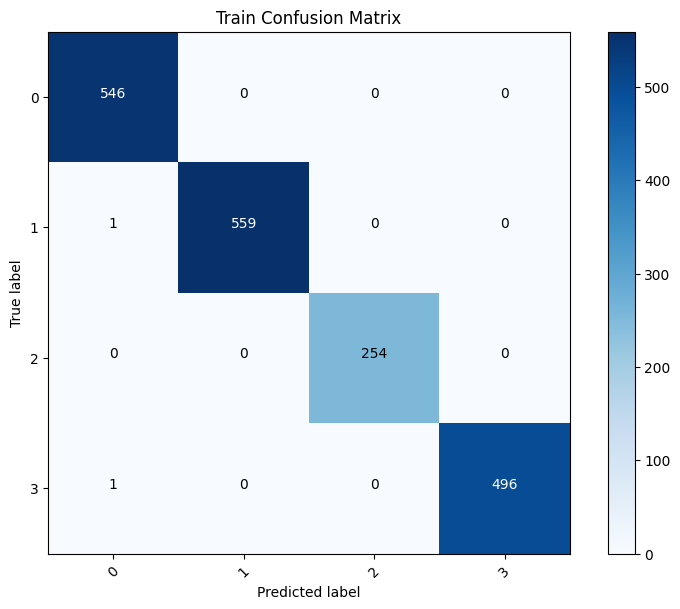

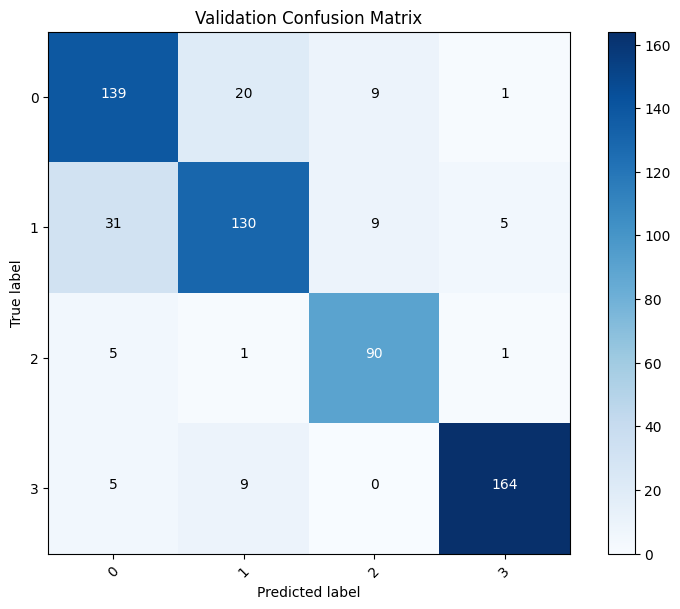

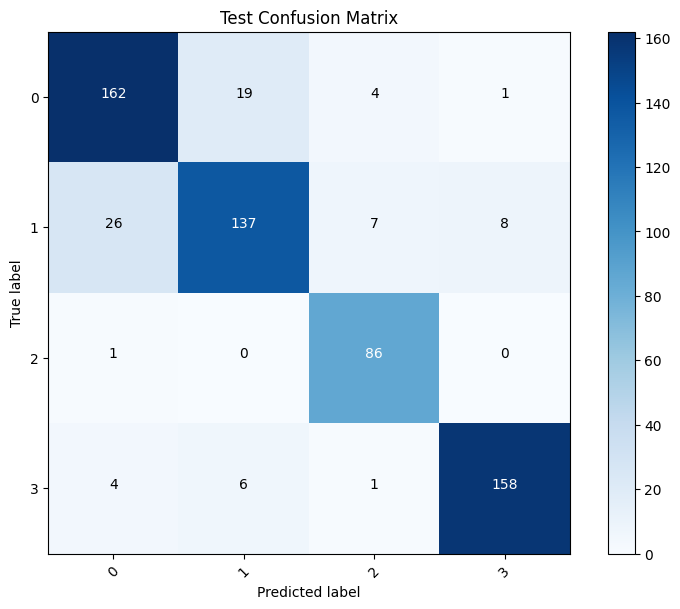

In [18]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_labels, test_preds)

print(classification_report(train_labels, train_preds))
print(classification_report(val_labels, val_preds))
print(classification_report(test_labels, test_preds))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()

Training and Testing PreBuilt ResNet:

In [19]:
for epoch in tqdm(range(epochs2), desc="Training", unit="epoch"):
    train_loss, train_accuracy, train_labels2, train_preds2 = train(model2, train_loader=train_loader,optimizer=optimizer2, criterion=criterion2, device=device)
    val_loss, val_accuracy, val_labels2, val_preds2 = evaluate(model2, val_loader, criterion=criterion2, device=device)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )


Training:   3%|▎         | 1/30 [01:45<50:45, 105.01s/epoch]

Epoch [1/20] Train Loss: 1.3753 Train Accuracy: 29.78% Validation Loss: 1.3420 Validation Accuracy: 34.73%


Training:   7%|▋         | 2/30 [03:28<48:40, 104.31s/epoch]

Epoch [2/20] Train Loss: 1.3767 Train Accuracy: 30.43% Validation Loss: 1.3657 Validation Accuracy: 31.18%


Training:  10%|█         | 3/30 [05:14<47:16, 105.06s/epoch]

Epoch [3/20] Train Loss: 1.3726 Train Accuracy: 30.80% Validation Loss: 1.3685 Validation Accuracy: 30.21%


Training:  13%|█▎        | 4/30 [06:58<45:15, 104.43s/epoch]

Epoch [4/20] Train Loss: 1.3737 Train Accuracy: 30.80% Validation Loss: 1.3741 Validation Accuracy: 28.92%


Training:  17%|█▋        | 5/30 [08:41<43:23, 104.15s/epoch]

Epoch [5/20] Train Loss: 1.3734 Train Accuracy: 30.16% Validation Loss: 1.3682 Validation Accuracy: 30.21%


Training:  20%|██        | 6/30 [10:25<41:34, 103.93s/epoch]

Epoch [6/20] Train Loss: 1.3765 Train Accuracy: 30.75% Validation Loss: 1.3698 Validation Accuracy: 29.73%


Training:  23%|██▎       | 7/30 [12:08<39:47, 103.79s/epoch]

Epoch [7/20] Train Loss: 1.3754 Train Accuracy: 30.75% Validation Loss: 1.3757 Validation Accuracy: 29.40%


Training:  27%|██▋       | 8/30 [13:52<38:00, 103.68s/epoch]

Epoch [8/20] Train Loss: 1.3734 Train Accuracy: 29.67% Validation Loss: 1.3731 Validation Accuracy: 29.73%


Training:  30%|███       | 9/30 [15:35<36:15, 103.61s/epoch]

Epoch [9/20] Train Loss: 1.3733 Train Accuracy: 28.97% Validation Loss: 1.3736 Validation Accuracy: 30.69%


Training:  33%|███▎      | 10/30 [17:19<34:30, 103.51s/epoch]

Epoch [10/20] Train Loss: 1.3777 Train Accuracy: 30.64% Validation Loss: 1.3736 Validation Accuracy: 29.89%


Training:  37%|███▋      | 11/30 [19:02<32:43, 103.35s/epoch]

Epoch [11/20] Train Loss: 1.3730 Train Accuracy: 29.51% Validation Loss: 1.3737 Validation Accuracy: 28.76%


Training:  40%|████      | 12/30 [20:45<31:00, 103.34s/epoch]

Epoch [12/20] Train Loss: 1.3754 Train Accuracy: 30.43% Validation Loss: 1.3721 Validation Accuracy: 29.56%


Training:  43%|████▎     | 13/30 [22:28<29:17, 103.36s/epoch]

Epoch [13/20] Train Loss: 1.3704 Train Accuracy: 30.86% Validation Loss: 1.3715 Validation Accuracy: 29.40%


Training:  47%|████▋     | 14/30 [24:12<27:33, 103.37s/epoch]

Epoch [14/20] Train Loss: 1.3735 Train Accuracy: 30.43% Validation Loss: 1.3764 Validation Accuracy: 28.43%


Training:  50%|█████     | 15/30 [25:55<25:50, 103.35s/epoch]

Epoch [15/20] Train Loss: 1.3742 Train Accuracy: 29.67% Validation Loss: 1.3708 Validation Accuracy: 30.05%


Training:  53%|█████▎    | 16/30 [27:38<24:07, 103.37s/epoch]

Epoch [16/20] Train Loss: 1.3769 Train Accuracy: 30.32% Validation Loss: 1.3725 Validation Accuracy: 30.05%


Training:  57%|█████▋    | 17/30 [29:22<22:23, 103.31s/epoch]

Epoch [17/20] Train Loss: 1.3720 Train Accuracy: 30.96% Validation Loss: 1.3670 Validation Accuracy: 28.59%


Training:  60%|██████    | 18/30 [31:05<20:38, 103.25s/epoch]

Epoch [18/20] Train Loss: 1.3728 Train Accuracy: 30.10% Validation Loss: 1.3744 Validation Accuracy: 30.21%


Training:  63%|██████▎   | 19/30 [32:48<18:54, 103.14s/epoch]

Epoch [19/20] Train Loss: 1.3733 Train Accuracy: 29.99% Validation Loss: 1.3743 Validation Accuracy: 30.05%


Training:  67%|██████▋   | 20/30 [34:31<17:12, 103.23s/epoch]

Epoch [20/20] Train Loss: 1.3735 Train Accuracy: 30.86% Validation Loss: 1.3776 Validation Accuracy: 29.56%


Training:  70%|███████   | 21/30 [36:14<15:29, 103.24s/epoch]

Epoch [21/20] Train Loss: 1.3713 Train Accuracy: 30.48% Validation Loss: 1.3695 Validation Accuracy: 28.76%


Training:  73%|███████▎  | 22/30 [37:57<13:45, 103.20s/epoch]

Epoch [22/20] Train Loss: 1.3754 Train Accuracy: 30.21% Validation Loss: 1.3690 Validation Accuracy: 29.24%


Training:  77%|███████▋  | 23/30 [39:41<12:02, 103.20s/epoch]

Epoch [23/20] Train Loss: 1.3772 Train Accuracy: 29.08% Validation Loss: 1.3727 Validation Accuracy: 29.56%


Training:  80%|████████  | 24/30 [41:24<10:19, 103.29s/epoch]

Epoch [24/20] Train Loss: 1.3743 Train Accuracy: 30.10% Validation Loss: 1.3723 Validation Accuracy: 29.89%


Training:  83%|████████▎ | 25/30 [43:07<08:36, 103.26s/epoch]

Epoch [25/20] Train Loss: 1.3742 Train Accuracy: 29.13% Validation Loss: 1.3690 Validation Accuracy: 30.21%


Training:  87%|████████▋ | 26/30 [44:51<06:53, 103.25s/epoch]

Epoch [26/20] Train Loss: 1.3752 Train Accuracy: 31.02% Validation Loss: 1.3653 Validation Accuracy: 31.18%


Training:  90%|█████████ | 27/30 [46:34<05:09, 103.26s/epoch]

Epoch [27/20] Train Loss: 1.3719 Train Accuracy: 30.80% Validation Loss: 1.3730 Validation Accuracy: 29.08%


Training:  93%|█████████▎| 28/30 [48:17<03:26, 103.24s/epoch]

Epoch [28/20] Train Loss: 1.3757 Train Accuracy: 30.37% Validation Loss: 1.3652 Validation Accuracy: 30.86%


Training:  97%|█████████▋| 29/30 [50:00<01:43, 103.22s/epoch]

Epoch [29/20] Train Loss: 1.3763 Train Accuracy: 29.29% Validation Loss: 1.3711 Validation Accuracy: 29.56%


Training: 100%|██████████| 30/30 [51:43<00:00, 103.46s/epoch]

Epoch [30/20] Train Loss: 1.3753 Train Accuracy: 29.56% Validation Loss: 1.3655 Validation Accuracy: 30.21%


In [20]:
test_losses2 = []
test_accuracies2 = []
for epoch in tqdm(range(epochs2), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss2, test_accuracy2, test_label2, test_preds2 = evaluate(model2, test_loader, criterion=criterion2, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses2.append(test_loss2)
    test_accuracies2.append(test_accuracy2)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs2}] "
        f"Test Loss: {test_loss2:.4f} "
        f"Test Accuracy: {test_accuracy2 * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses2) / len(test_losses2)
avg_test_accuracy = sum(test_accuracies2) / len(test_accuracies2)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:   3%|▎         | 1/30 [00:04<02:08,  4.43s/epoch]

Testing Epoch [1/30] Test Loss: 1.3708 Test Accuracy: 30.00% Time per Epoch: 4.43 seconds


Testing:   7%|▋         | 2/30 [00:08<02:03,  4.42s/epoch]

Testing Epoch [2/30] Test Loss: 1.3659 Test Accuracy: 30.00% Time per Epoch: 4.41 seconds


Testing:  10%|█         | 3/30 [00:13<01:58,  4.40s/epoch]

Testing Epoch [3/30] Test Loss: 1.3703 Test Accuracy: 30.00% Time per Epoch: 4.37 seconds


Testing:  13%|█▎        | 4/30 [00:17<01:54,  4.40s/epoch]

Testing Epoch [4/30] Test Loss: 1.3683 Test Accuracy: 30.00% Time per Epoch: 4.41 seconds


Testing:  17%|█▋        | 5/30 [00:22<01:50,  4.42s/epoch]

Testing Epoch [5/30] Test Loss: 1.3686 Test Accuracy: 30.00% Time per Epoch: 4.45 seconds


Testing:  20%|██        | 6/30 [00:26<01:45,  4.41s/epoch]

Testing Epoch [6/30] Test Loss: 1.3687 Test Accuracy: 30.00% Time per Epoch: 4.39 seconds


Testing:  23%|██▎       | 7/30 [00:30<01:41,  4.41s/epoch]

Testing Epoch [7/30] Test Loss: 1.3662 Test Accuracy: 30.00% Time per Epoch: 4.40 seconds


Testing:  27%|██▋       | 8/30 [00:35<01:36,  4.41s/epoch]

Testing Epoch [8/30] Test Loss: 1.3676 Test Accuracy: 30.00% Time per Epoch: 4.40 seconds


Testing:  30%|███       | 9/30 [00:39<01:32,  4.41s/epoch]

Testing Epoch [9/30] Test Loss: 1.3658 Test Accuracy: 30.00% Time per Epoch: 4.40 seconds


Testing:  33%|███▎      | 10/30 [00:44<01:28,  4.43s/epoch]

Testing Epoch [10/30] Test Loss: 1.3674 Test Accuracy: 30.00% Time per Epoch: 4.47 seconds


Testing:  37%|███▋      | 11/30 [00:48<01:23,  4.40s/epoch]

Testing Epoch [11/30] Test Loss: 1.3686 Test Accuracy: 30.00% Time per Epoch: 4.34 seconds


Testing:  40%|████      | 12/30 [00:52<01:19,  4.40s/epoch]

Testing Epoch [12/30] Test Loss: 1.3690 Test Accuracy: 30.00% Time per Epoch: 4.40 seconds


Testing:  43%|████▎     | 13/30 [00:57<01:14,  4.40s/epoch]

Testing Epoch [13/30] Test Loss: 1.3663 Test Accuracy: 30.00% Time per Epoch: 4.40 seconds


Testing:  47%|████▋     | 14/30 [01:01<01:10,  4.39s/epoch]

Testing Epoch [14/30] Test Loss: 1.3665 Test Accuracy: 30.00% Time per Epoch: 4.37 seconds


Testing:  50%|█████     | 15/30 [01:06<01:06,  4.42s/epoch]

Testing Epoch [15/30] Test Loss: 1.3705 Test Accuracy: 30.00% Time per Epoch: 4.48 seconds


Testing:  53%|█████▎    | 16/30 [01:10<01:01,  4.39s/epoch]

Testing Epoch [16/30] Test Loss: 1.3682 Test Accuracy: 30.00% Time per Epoch: 4.34 seconds


Testing:  57%|█████▋    | 17/30 [01:14<00:57,  4.40s/epoch]

Testing Epoch [17/30] Test Loss: 1.3679 Test Accuracy: 30.00% Time per Epoch: 4.39 seconds


Testing:  60%|██████    | 18/30 [01:19<00:52,  4.39s/epoch]

Testing Epoch [18/30] Test Loss: 1.3669 Test Accuracy: 30.00% Time per Epoch: 4.38 seconds


Testing:  63%|██████▎   | 19/30 [01:23<00:48,  4.39s/epoch]

Testing Epoch [19/30] Test Loss: 1.3664 Test Accuracy: 30.00% Time per Epoch: 4.40 seconds


Testing:  67%|██████▋   | 20/30 [01:28<00:44,  4.41s/epoch]

Testing Epoch [20/30] Test Loss: 1.3662 Test Accuracy: 30.00% Time per Epoch: 4.43 seconds


Testing:  70%|███████   | 21/30 [01:32<00:39,  4.40s/epoch]

Testing Epoch [21/30] Test Loss: 1.3706 Test Accuracy: 29.84% Time per Epoch: 4.39 seconds


Testing:  73%|███████▎  | 22/30 [01:36<00:35,  4.41s/epoch]

Testing Epoch [22/30] Test Loss: 1.3672 Test Accuracy: 30.00% Time per Epoch: 4.44 seconds


Testing:  77%|███████▋  | 23/30 [01:41<00:30,  4.41s/epoch]

Testing Epoch [23/30] Test Loss: 1.3657 Test Accuracy: 30.00% Time per Epoch: 4.40 seconds


Testing:  80%|████████  | 24/30 [01:45<00:26,  4.41s/epoch]

Testing Epoch [24/30] Test Loss: 1.3689 Test Accuracy: 30.00% Time per Epoch: 4.40 seconds


Testing:  83%|████████▎ | 25/30 [01:50<00:22,  4.41s/epoch]

Testing Epoch [25/30] Test Loss: 1.3665 Test Accuracy: 30.00% Time per Epoch: 4.41 seconds


Testing:  87%|████████▋ | 26/30 [01:54<00:17,  4.39s/epoch]

Testing Epoch [26/30] Test Loss: 1.3671 Test Accuracy: 30.00% Time per Epoch: 4.35 seconds


Testing:  90%|█████████ | 27/30 [01:58<00:13,  4.41s/epoch]

Testing Epoch [27/30] Test Loss: 1.3668 Test Accuracy: 30.00% Time per Epoch: 4.45 seconds


Testing:  93%|█████████▎| 28/30 [02:03<00:08,  4.41s/epoch]

Testing Epoch [28/30] Test Loss: 1.3661 Test Accuracy: 30.00% Time per Epoch: 4.39 seconds


Testing:  97%|█████████▋| 29/30 [02:07<00:04,  4.42s/epoch]

Testing Epoch [29/30] Test Loss: 1.3691 Test Accuracy: 30.00% Time per Epoch: 4.44 seconds


Testing: 100%|██████████| 30/30 [02:12<00:00,  4.41s/epoch]

Testing Epoch [30/30] Test Loss: 1.3672 Test Accuracy: 30.00% Time per Epoch: 4.38 seconds
Average Test Loss: 1.3677
Average Test Accuracy: 29.99%


Model Classification for Model 2:

              precision    recall  f1-score   support

           0       0.32      0.08      0.13       546
           1       0.34      0.40      0.37       560
           2       0.17      0.37      0.23       254
           3       0.37      0.37      0.37       497

    accuracy                           0.30      1857
   macro avg       0.30      0.31      0.28      1857
weighted avg       0.32      0.30      0.28      1857

              precision    recall  f1-score   support

           0       0.30      0.08      0.12       169
           1       0.33      0.42      0.37       175
           2       0.20      0.33      0.25        97
           3       0.36      0.38      0.37       178

    accuracy                           0.30       619
   macro avg       0.30      0.30      0.28       619
weighted avg       0.31      0.30      0.28       619

              precision    recall  f1-score   support

           0       0.34      0.05      0.09       186
           1       0.

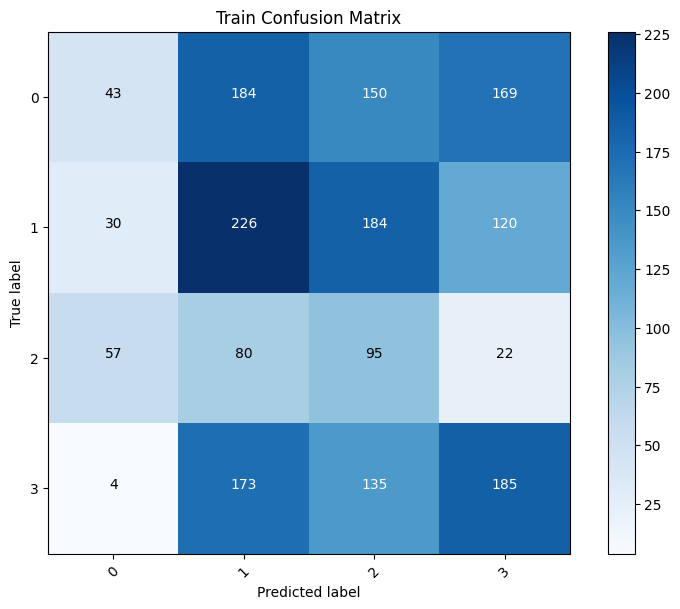

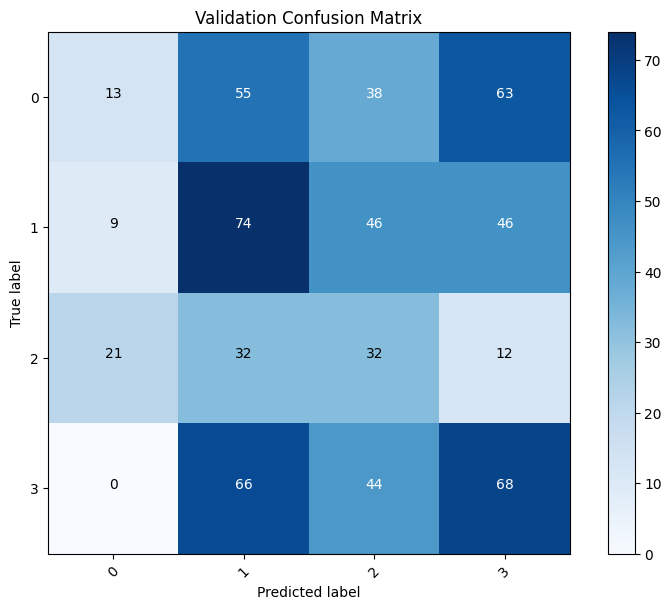

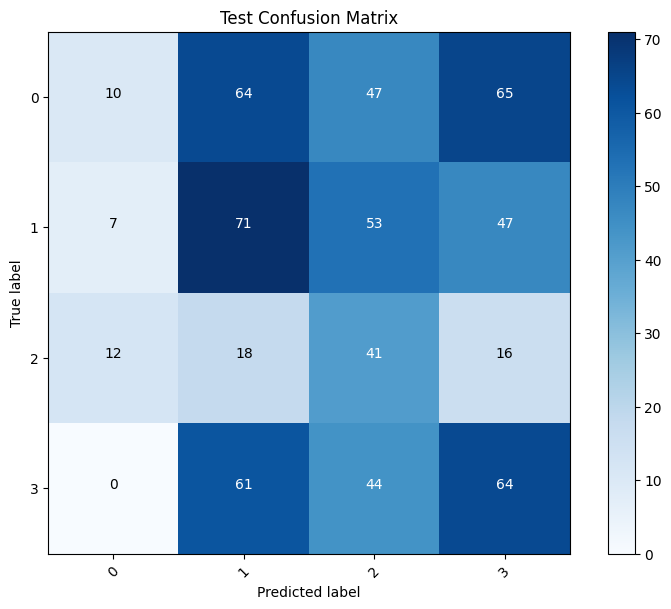

In [21]:
confusion_train = confusion_matrix(train_labels2, train_preds2)
confusion_val = confusion_matrix(val_labels2, val_preds2)
confusion_test = confusion_matrix(test_label2, test_preds2)

print(classification_report(train_labels2, train_preds2))
print(classification_report(val_labels2, val_preds2))
print(classification_report(test_label2, test_preds2))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()